## Accessing Files in the SMCE
#### Rishi Anand

We will use the following libraries to access and analyze data stored in the SMCE.

In [3]:
import xarray as xr
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import s3fs

### Files larger than 10GB

If the file(s) you want to analyze are larger than 10GB, you will have to use the s3 filesystem (s3fs) to access the data. No credentials are required.

In [4]:
url = 's3://nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc'
s3 = s3fs.S3FileSystem({'anon':True})
s3.ls('nasa-waterinsight/test/NLDAS3_Forcing/201501/')

['nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150101.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150102.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150103.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150104.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150105.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150106.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150107.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150108.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150109.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150110.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201501/NLDAS_FOR0010_H.A20150111.030.beta.nc',
 'nasa-waterinsight/test/NLDAS3_Forcing/201

opening
268.73532
done


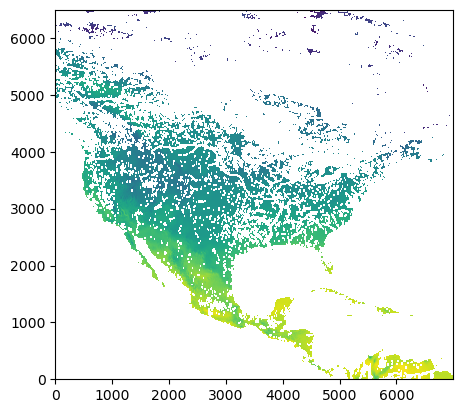

In [12]:
# Open the file specified in url and plot a variable in the data
with s3.open(url) as infile:
    print("opening")
    ds = xr.open_dataset(infile, engine="h5netcdf")
    ds = ds['Tair'].isel(time=0, lon=slice(4000, 11000)).to_numpy()
    print(ds[2500][2500])
    plt.imshow(ds, origin='lower')
    print("done")